<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/220309_Process_Mining2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-2-4cf57053421f

In [67]:
# !pip install pm4py
from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.objects.log.importer.xes import importer as xes_importer

Preparing the Data

In [69]:
import requests
from io import StringIO
import pandas as pd

url = "https://gitlab.com/healthcare2/process-mining-tutorial/-/raw/master/ArtificialPatientTreatment.csv"
# Reading URL, decoding and converting it to pandas dataframe using read_csv
eventlog = pd.read_csv(StringIO(requests.get(url).text), on_bad_lines='skip')
# Printing the first 5 rows of the dataframe
eventlog.head()

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [78]:
eventlog.rename(columns={' DateTime': 'time:timestamp', 
'patient': 'case:concept:name', ' action': 'concept:name', ' org:resource': 'org:resource'}, inplace=True)
eventlog['time:timestamp']= pd.to_datetime(eventlog['time:timestamp'])
eventlog.head()

,case:concept:name,concept:name,org:resource,time:timestamp
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [79]:
events.columns

Index(['patient', ' action', ' org:resource', ' DateTime', 'caseend',
       'casestart'],
      dtype='object')

In [80]:
## Convert to log format 
log = log_converter.apply(eventlog)

Process Discovery with Alpha Miner

In [81]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  after removing the cwd from sys.path.


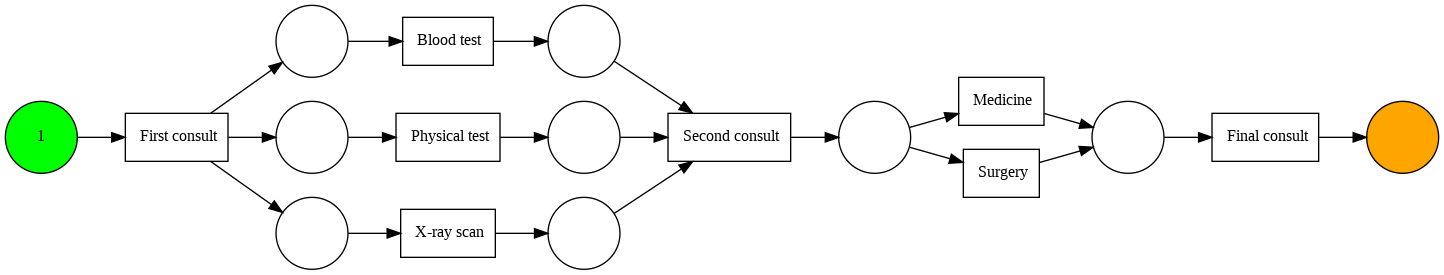

In [82]:
## Import the petrinet visualizer object
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  


replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

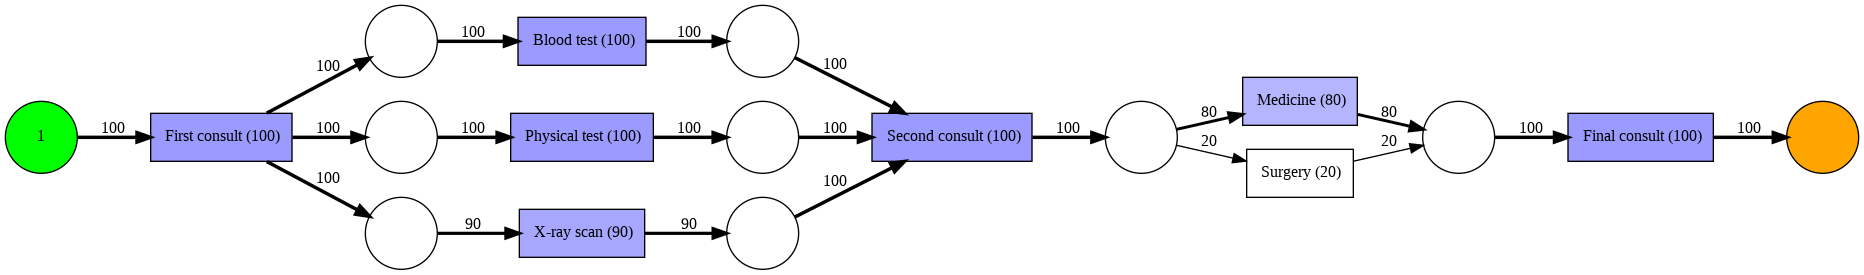

In [83]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.view(gviz)

Use the Heuristic Miner

In [84]:
## Import heuristics miner algorithm
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

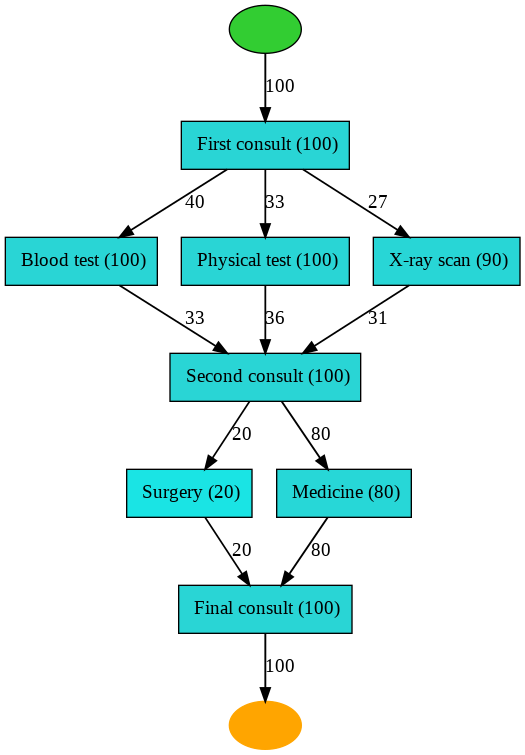

In [86]:
# Import the heuristics net visualisation object
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# Visualise model
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  """


replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

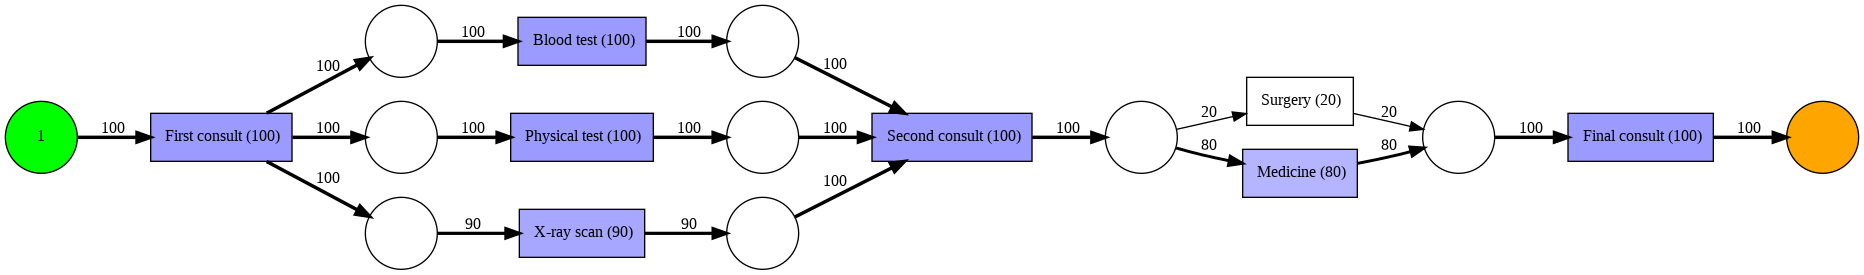

In [94]:
# heuristics miner algorithm returning model, initial marking and
# final marking
net, im, fm = heuristics_miner.apply(log)
# Petri net visualisation
gviz = pn_visualizer.apply(net, im,fm, variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.view(gviz)

Unisng the Inductive Miner (Discovery in a Tree Form)

In [88]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
# Discover process tree using inductive miner
tree = inductive_miner.apply_tree(log)

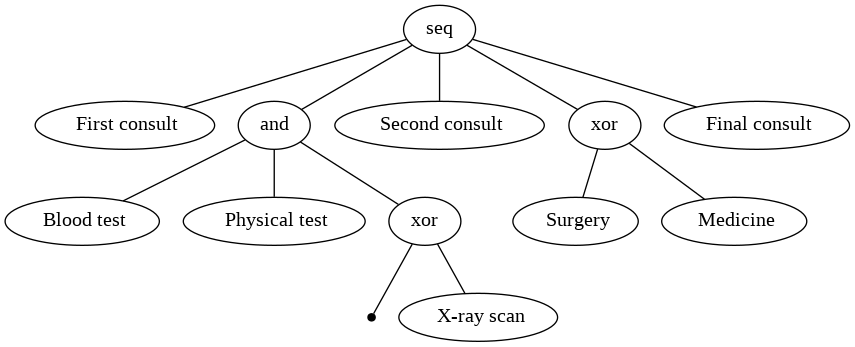

In [89]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer
# Visualise the tree
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  after removing the cwd from sys.path.


replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

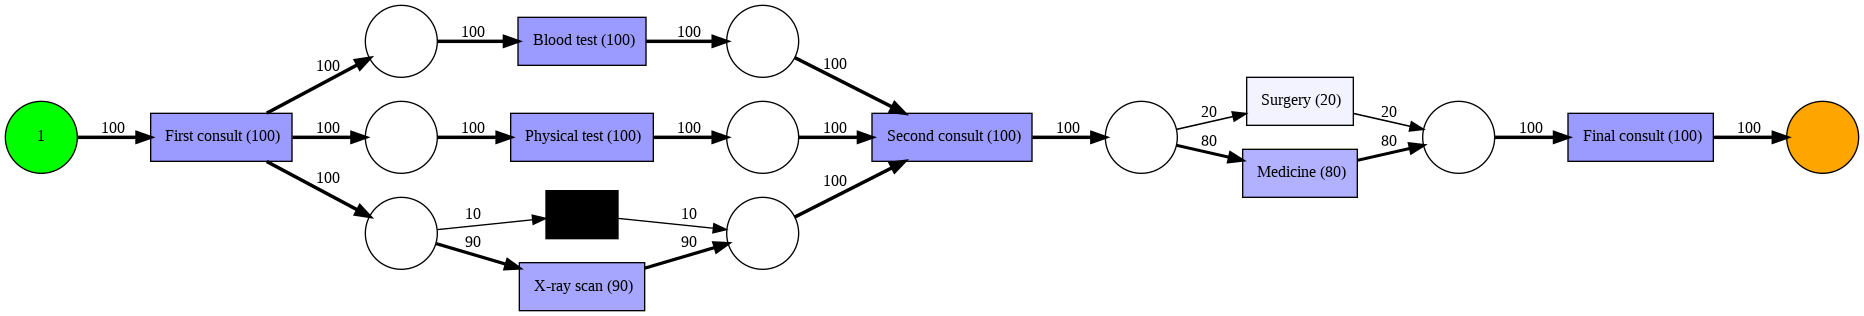

In [91]:
## Either discover the petri net using inductive miner
net, initial_marking, final_marking = inductive_miner.apply(log)
## Then visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.view(gviz)

Comparing Models with the directly-follows grapoh (DFG)

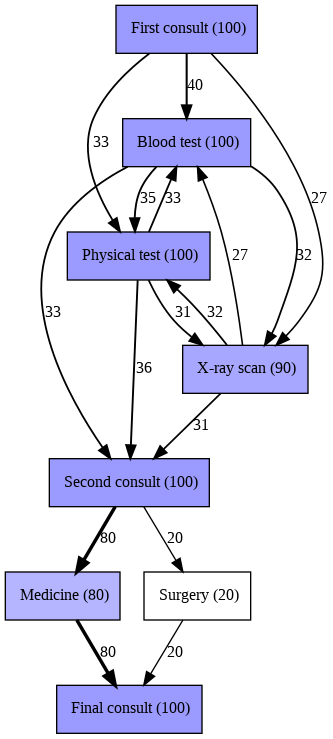

In [95]:
## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization
#Create graph from log
dfg = dfg_discovery.apply(log)
# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

Analysis applied to Healthcare

In [96]:
from pm4py.objects.petri import performance_map
traces = performance_map.get_transition_performance_with_token_replay(log, net, initial_marking, final_marking)

/usr/local/lib/python3.7/dist-packages/pm4py/objects/petri/__init__.py:19: UserWarning: please use the pm4py.objects.petri_net package instead.
  warnings.warn('please use the pm4py.objects.petri_net package instead.')
/usr/local/lib/python3.7/dist-packages/pm4py/objects/petri/obj.py:19: UserWarning: pm4py.objects.petri.obj is deprecated. Please use the class pm4py.objects.petri_net.obj instead.
  warnings.warn("pm4py.objects.petri.obj is deprecated. Please use the class pm4py.objects.petri_net.obj instead.")
/usr/local/lib/python3.7/dist-packages/pm4py/objects/petri/exporter/__init__.py:21: UserWarning: please use the pm4py.objects.petri_net.exporter package instead.
  warnings.warn('please use the pm4py.objects.petri_net.exporter package instead.')
/usr/local/lib/python3.7/dist-packages/pm4py/objects/petri/importer/__init__.py:21: UserWarning: please use the pm4py.objects.petri_net.importer package instead.
  warnings.warn('please use the pm4py.objects.petri_net.importer package inst

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

In [97]:
print(traces)

{"( Physical test, ' Physical test')": {'all_values': [1324.0, 3728.0, 3786.0, 4119.0, 4419.0, 4549.0, 5284.0, 8224.0, 8966.0, 11978.0, 13665.0, 15135.0, 19270.0, 22756.0, 55185.0, 62407.0, 62940.0, 70371.0, 72111.0, 72732.0, 76227.0, 76535.0, 76990.0, 79574.0, 79787.0, 79824.0, 83889.0, 84127.0, 86790.0, 86915.0, 87789.0, 87882.0, 87934.0, 87965.0, 89945.0, 90478.0, 90843.0, 91653.0, 92013.0, 94050.0, 95249.0, 96921.0, 98018.0, 98172.0, 101388.0, 101836.0, 105553.0, 106128.0, 109250.0, 112528.0, 148057.0, 154925.0, 155327.0, 159333.0, 162912.0, 167121.0, 169332.0, 170112.0, 172510.0, 234955.0, 236486.0, 239344.0, 249188.0, 256764.0, 258750.0, 274061.0, 274969.0, 277517.0, 280843.0, 282508.0, 324082.0, 325222.0, 327893.0, 328926.0, 336947.0, 338382.0, 339286.0, 339364.0, 342359.0, 345644.0, 349303.0, 354594.0, 356208.0, 368416.0, 419331.0, 438032.0, 505680.0, 507184.0, 507266.0, 512865.0, 518387.0, 525454.0, 528833.0, 531654.0, 583384.0, 584659.0, 591554.0, 596840.0, 598090.0, 604693.0

In [104]:
traces.keys()

dict_keys(["( Physical test, ' Physical test')", "( X-ray scan, ' X-ray scan')", "( Blood test, ' Blood test')", "( Second consult, ' Second consult')", "( Medicine, ' Medicine')", "( Surgery, ' Surgery')", "( Final consult, ' Final consult')"])

In [106]:
## Get all the times to surgery
surgery_time = traces["( Surgery, ' Surgery')"]['all_values']
seconds_to_days = 60*60*24
seconds_to_hours = 60*60
## Calculate the summary statistics (given in seconds)
mean_time_to_surgery_seconds = np.mean(surgery_time)
max_time_to_surgery_seconds = np.max(surgery_time)
min_time_to_surgery_seconds = np.min(surgery_time)
## Converted to days
mean_time_to_surgery_days = np.mean(surgery_time)/seconds_to_days
max_time_to_surgery_days = np.max(surgery_time)/seconds_to_days
min_time_to_surgery_days = np.min(surgery_time)/seconds_to_days
## Or to hours:
mean_time_to_surgery_hours = np.mean(surgery_time)/seconds_to_hours
max_time_to_surgery_hours = np.max(surgery_time)/seconds_to_hours
min_time_to_surgery_hours = np.min(surgery_time)/seconds_to_hours

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


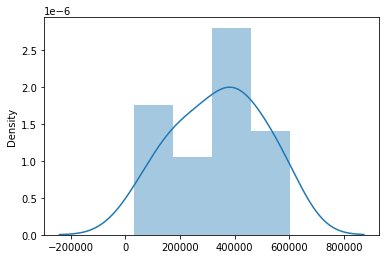

In [107]:
sns.distplot(surgery_time)

In [108]:
eventlog.columns

Index(['case:concept:name', 'concept:name', 'org:resource', 'time:timestamp'], dtype='object')

In [111]:
pd.crosstab(eventlog['concept:name'], eventlog['org:resource'])

org:resource,Dr. Alex,Dr. Anna,Dr. Ben,Dr. Bob,Dr. Charlie,Dr. Quinn,Dr. Rudy,Lab,Nurse Corey,Nurse Jesse,Pharmacy,Team 1,Team 2
concept:name,,,,,,,,,,,,,
Blood test,0,0,0,0,0,0,0,100,0,0,0,0,0
Final consult,0,50,50,0,0,0,0,0,0,0,0,0,0
First consult,0,53,0,47,0,0,0,0,0,0,0,0,0
Medicine,0,0,0,0,0,0,0,0,0,0,80,0,0
Physical test,0,0,0,0,0,0,0,0,43,57,0,0,0
Second consult,0,55,0,45,0,0,0,0,0,0,0,0,0
Surgery,5,0,0,0,5,3,7,0,0,0,0,0,0
X-ray scan,0,0,0,0,0,0,0,0,0,0,0,40,50


In [112]:
pd.crosstab(eventlog['concept:name'], eventlog['org:resource'], normalize='columns')

org:resource,Dr. Alex,Dr. Anna,Dr. Ben,Dr. Bob,Dr. Charlie,Dr. Quinn,Dr. Rudy,Lab,Nurse Corey,Nurse Jesse,Pharmacy,Team 1,Team 2
concept:name,,,,,,,,,,,,,
Blood test,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Final consult,0.0,0.316456,1.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
First consult,0.0,0.335443,0.0,0.51087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Medicine,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Physical test,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Second consult,0.0,0.348101,0.0,0.48913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Surgery,1.0,0.000000,0.0,0.00000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
X-ray scan,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [113]:
pd.crosstab(eventlog['concept:name'], eventlog['org:resource'], normalize='index')

org:resource,Dr. Alex,Dr. Anna,Dr. Ben,Dr. Bob,Dr. Charlie,Dr. Quinn,Dr. Rudy,Lab,Nurse Corey,Nurse Jesse,Pharmacy,Team 1,Team 2
concept:name,,,,,,,,,,,,,
Blood test,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.0,0.000000,0.000000
Final consult,0.00,0.50,0.5,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.000000,0.000000
First consult,0.00,0.53,0.0,0.47,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.000000,0.000000
Medicine,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.0,0.000000,0.000000
Physical test,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.43,0.57,0.0,0.000000,0.000000
Second consult,0.00,0.55,0.0,0.45,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.000000,0.000000
Surgery,0.25,0.00,0.0,0.00,0.25,0.15,0.35,0.0,0.00,0.00,0.0,0.000000,0.000000
X-ray scan,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.444444,0.555556


Other Analyses

In [124]:
# Rework
from pm4py.statistics.rework.cases.log import get as rework_cases

dictio = rework_cases.apply(log)
dictio

{'patient 0': {'number_activities': 6, 'rework': 0},
 'patient 1': {'number_activities': 7, 'rework': 0},
 'patient 10': {'number_activities': 7, 'rework': 0},
 'patient 11': {'number_activities': 7, 'rework': 0},
 'patient 12': {'number_activities': 7, 'rework': 0},
 'patient 13': {'number_activities': 7, 'rework': 0},
 'patient 14': {'number_activities': 7, 'rework': 0},
 'patient 15': {'number_activities': 6, 'rework': 0},
 'patient 16': {'number_activities': 7, 'rework': 0},
 'patient 17': {'number_activities': 7, 'rework': 0},
 'patient 18': {'number_activities': 7, 'rework': 0},
 'patient 19': {'number_activities': 7, 'rework': 0},
 'patient 2': {'number_activities': 7, 'rework': 0},
 'patient 20': {'number_activities': 7, 'rework': 0},
 'patient 21': {'number_activities': 7, 'rework': 0},
 'patient 22': {'number_activities': 7, 'rework': 0},
 'patient 23': {'number_activities': 7, 'rework': 0},
 'patient 24': {'number_activities': 7, 'rework': 0},
 'patient 25': {'number_activit

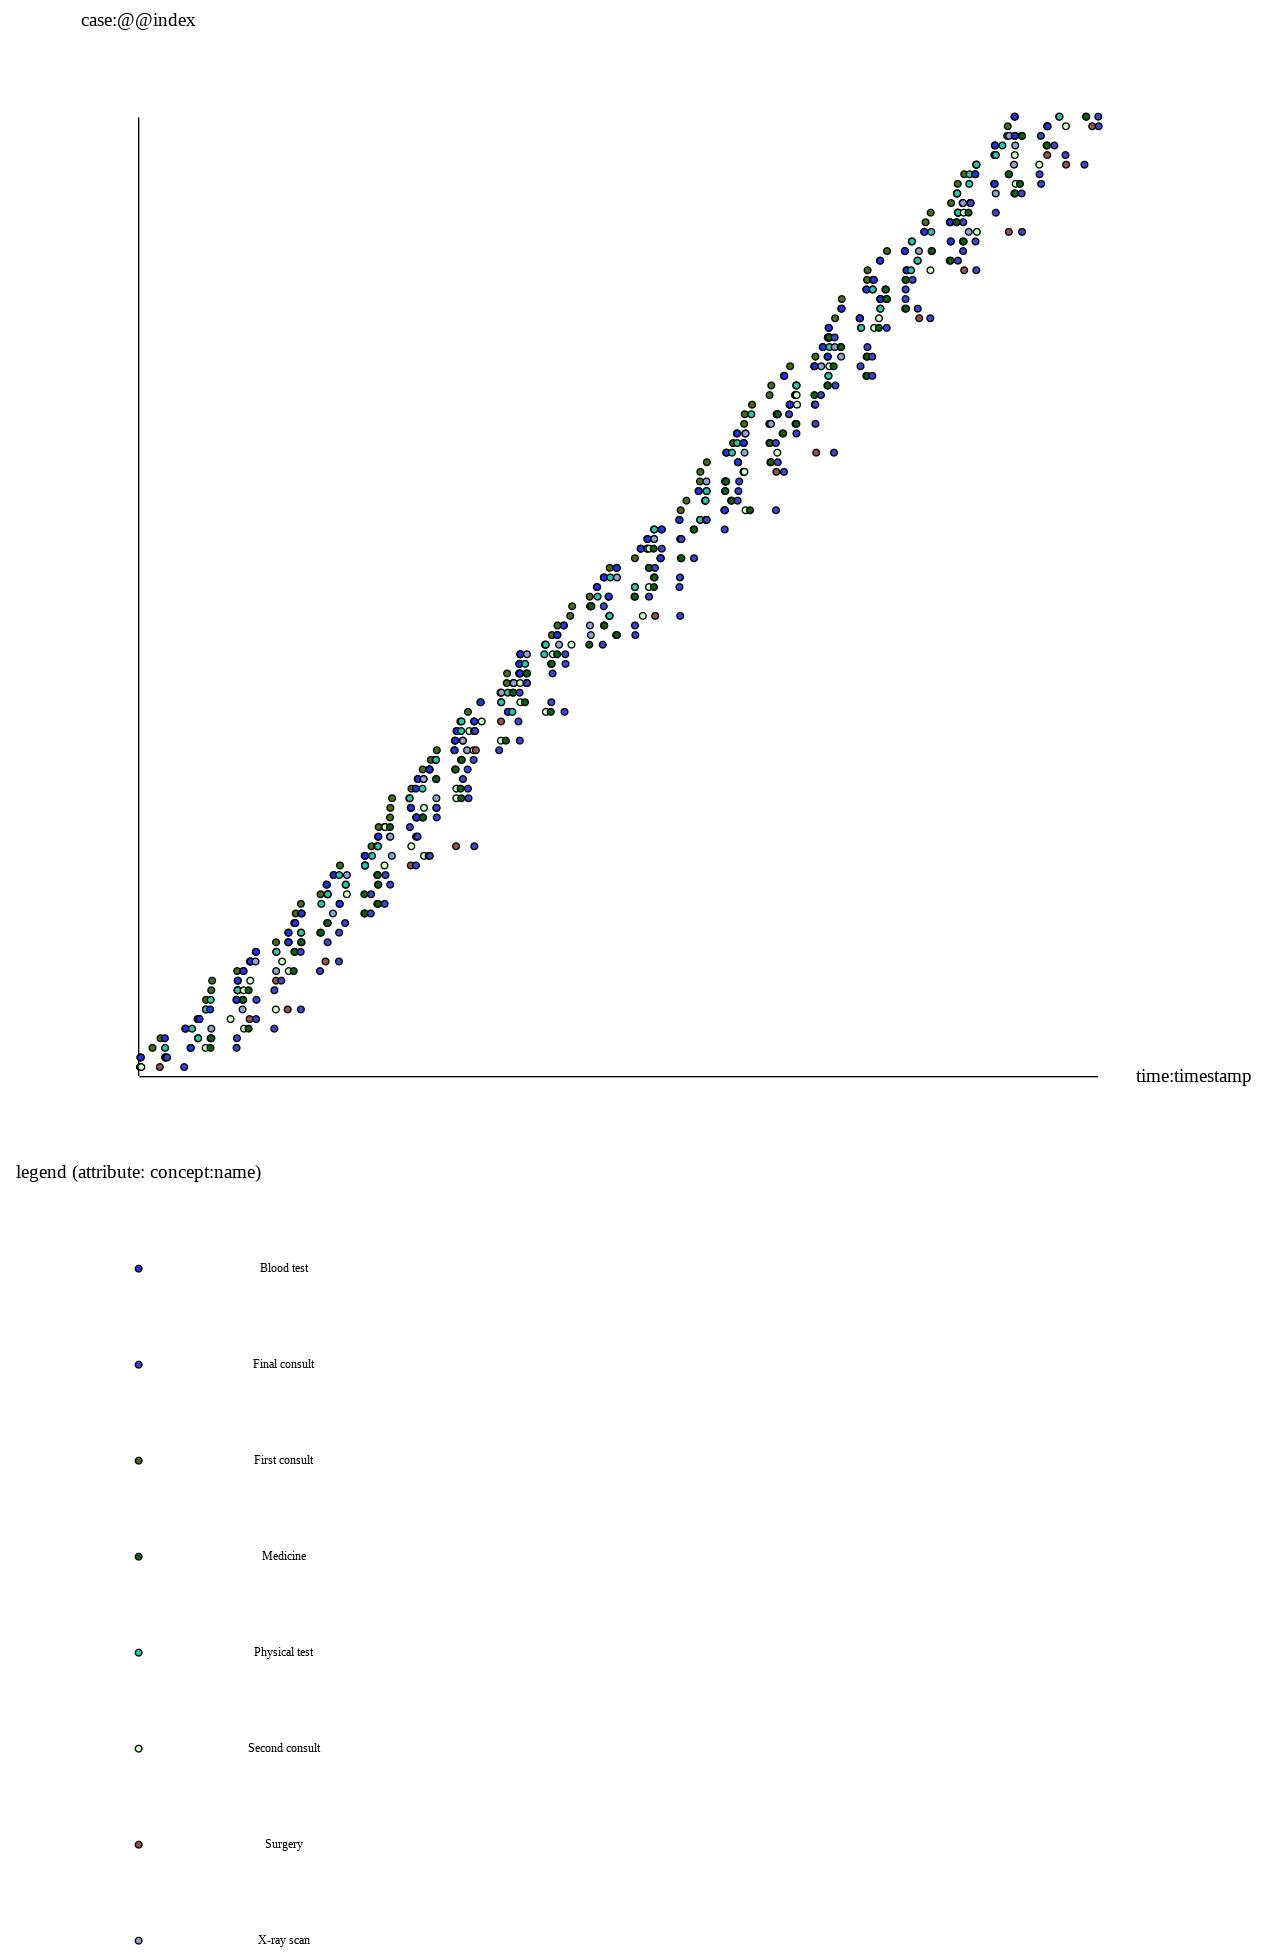

In [129]:
import pm4py
pm4py.view_dotted_chart(log, format="jpeg")

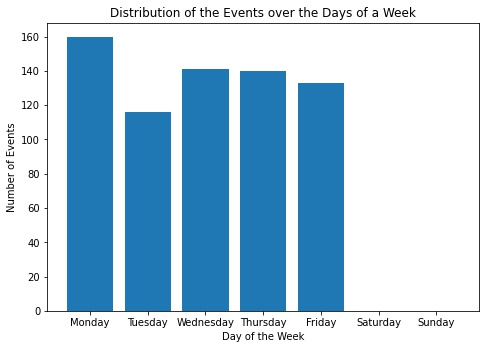

In [130]:
pm4py.view_events_distribution_graph(log, distr_type="days_week", format="jpeg")

In [132]:
# Throughput time
from pm4py.statistics.traces.generic.log import case_statistics
all_case_durations = case_statistics.get_all_casedurations(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})
all_case_durations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecatedWarning: get_all_casedurations is deprecated as of 2.2.11 and will be removed in 3.0.0. please use get_all_case_durations instead
  after removing the cwd from sys.path.


[92044.0,
 250020.0,
 256478.0,
 263060.0,
 272357.0,
 284831.0,
 359926.0,
 369153.0,
 419066.0,
 424825.0,
 453235.0,
 458801.0,
 506864.0,
 527172.0,
 529747.0,
 531349.0,
 536839.0,
 574218.0,
 575205.0,
 593357.0,
 595345.0,
 601951.0,
 603232.0,
 603319.0,
 606533.0,
 607342.0,
 608684.0,
 611127.0,
 611555.0,
 621457.0,
 622221.0,
 628224.0,
 677531.0,
 679722.0,
 682715.0,
 683701.0,
 688596.0,
 690760.0,
 693634.0,
 698084.0,
 758873.0,
 763378.0,
 775073.0,
 780410.0,
 780415.0,
 788093.0,
 794560.0,
 797009.0,
 799596.0,
 800812.0,
 838455.0,
 848601.0,
 850875.0,
 856484.0,
 857050.0,
 857324.0,
 861503.0,
 871749.0,
 873454.0,
 874761.0,
 874830.0,
 928971.0,
 946219.0,
 949810.0,
 952806.0,
 953274.0,
 954266.0,
 958235.0,
 1008518.0,
 1012042.0,
 1020540.0,
 1022248.0,
 1024701.0,
 1026368.0,
 1026471.0,
 1026792.0,
 1040567.0,
 1047221.0,
 1110755.0,
 1112762.0,
 1121202.0,
 1121449.0,
 1123298.0,
 1125842.0,
 1126172.0,
 1129919.0,
 1187272.0,
 1196574.0,
 1197473.0,
 

In [133]:
median_case_duration = case_statistics.get_median_caseduration(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"
})
median_case_duration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecatedWarning: get_median_caseduration is deprecated as of 2.2.11 and will be removed in 3.0.0. please use get_median_case_duration instead
  


838455.0

In [136]:
# Case arrival and dispersion ratio
from pm4py.statistics.traces.generic.log import case_arrival
case_arrival_ratio = case_arrival.get_case_arrival_avg(log, parameters={
    case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})
case_dispersion_ratio = case_arrival.get_case_dispersion_avg(log, parameters={
    case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})
case_dispersion_ratio

126452.64646464646

In [137]:
from pm4py.statistics.eventually_follows.log import get as efg_get

efg_graph = efg_get.apply(log)
print(efg_graph)

{(' First consult', ' Blood test'): 100, (' First consult', ' Physical test'): 100, (' First consult', ' Second consult'): 100, (' First consult', ' Surgery'): 20, (' First consult', ' Final consult'): 100, (' Blood test', ' Physical test'): 53, (' Blood test', ' Second consult'): 100, (' Blood test', ' Surgery'): 20, (' Blood test', ' Final consult'): 100, (' Physical test', ' Second consult'): 100, (' Physical test', ' Surgery'): 20, (' Physical test', ' Final consult'): 100, (' Second consult', ' Surgery'): 20, (' Second consult', ' Final consult'): 100, (' Surgery', ' Final consult'): 20, (' First consult', ' X-ray scan'): 90, (' First consult', ' Medicine'): 80, (' Physical test', ' Blood test'): 47, (' Physical test', ' X-ray scan'): 45, (' Physical test', ' Medicine'): 80, (' Blood test', ' X-ray scan'): 49, (' Blood test', ' Medicine'): 80, (' X-ray scan', ' Second consult'): 90, (' X-ray scan', ' Medicine'): 74, (' X-ray scan', ' Final consult'): 90, (' Second consult', ' Medi

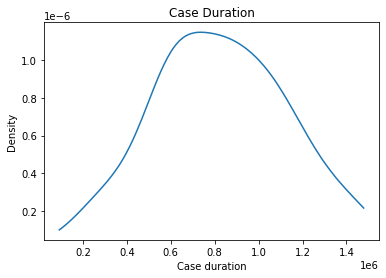

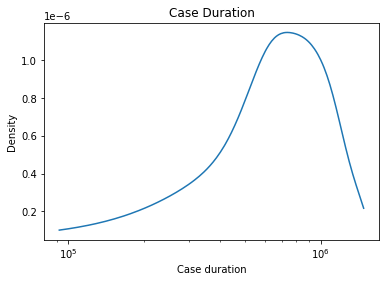

In [138]:
from pm4py.util import constants
from pm4py.statistics.traces.generic.log import case_statistics
x, y = case_statistics.get_kde_caseduration(log, parameters={constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.CASES)
graphs_visualizer.view(gviz)

gviz = graphs_visualizer.apply_semilogx(x, y, variant=graphs_visualizer.Variants.CASES)
graphs_visualizer.view(gviz)

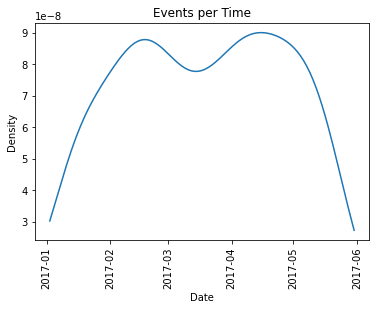

In [140]:
from pm4py.algo.filtering.log.attributes import attributes_filter
x, y = attributes_filter.get_kde_date_attribute(log, attribute="time:timestamp")

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.DATES)
graphs_visualizer.view(gviz)